In [28]:
# The goal is to elimiate blurry images

In [29]:
!pip install cvlib
!pip install imutils

In [83]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent
import torchvision.datasets
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
from google.colab import drive

import cv2
import matplotlib.pyplot as plt
import cvlib
from cvlib.object_detection import draw_bbox

from imutils import paths
import argparse
import cv2

import os
from shutil import copyfile

# set the random seed
torch.manual_seed(1) # set the random seed
np.random.seed(1000)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
directory_path = '/content/drive/My Drive/Colab Notebooks/Project/blur_detection/'

2099.8803679033113


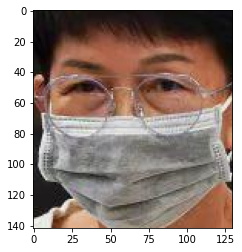

In [33]:
# test by showing the image here
img = cv2.imread(directory_path+'91.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

1417.25658618892


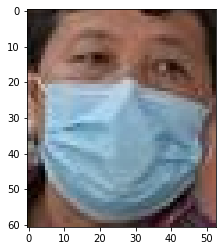

In [34]:
# test by showing the image here
img = cv2.imread(directory_path+'69.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

13.47276534679799


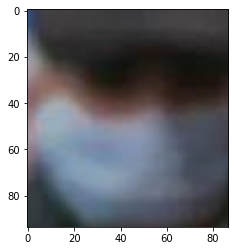

In [35]:
# test by showing the image here
img = cv2.imread(directory_path+'52.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

348.290730122449


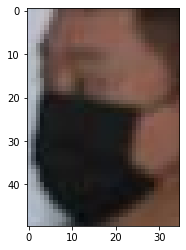

In [36]:
# test by showing the image here
img = cv2.imread(directory_path+'68.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

698.8108188340966


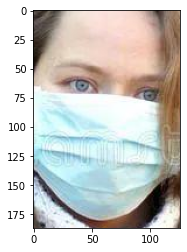

In [37]:
# test by showing the image here
img = cv2.imread(directory_path+'8.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

111.2859680863419


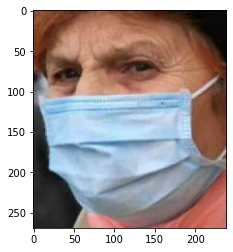

In [38]:
# test by showing the image here
img = cv2.imread(directory_path+'51.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB);
plt.imshow(img)
fm = cv2.Laplacian(gray, cv2.CV_64F).var()
print(fm)

In [79]:
# Attempting to loop through dataset_v2 to count number of images with laplacian variance less than 100 (on the cropped images)

threshold = 300

In [80]:
mask_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/mask/'

mask_counter = 0
total_mask_counter = 0

print("checking mask images")
for file in os.listdir(mask_path):
    # print(file)
    total_mask_counter+=1
    read_path = mask_path + file
    img = cv2.imread(read_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if (cv2.Laplacian(img, cv2.CV_64F).var() < threshold):
        mask_counter+=1
    img = []

print()
print("For mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_mask_counter)
print("Blurry Images:", mask_counter)

checking mask images

For mask (cropped images):
Threshold: 300
Total Images: 2694
Blurry Images: 523


In [81]:
nomask_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/nomask/'

nomask_counter = 0
total_nomask_counter = 0

print("checking no mask images")
for file in os.listdir(nomask_path):
    # print(file)
    total_nomask_counter+=1
    read_path = nomask_path + file
    img = cv2.imread(read_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if (cv2.Laplacian(img, cv2.CV_64F).var() < threshold):
        nomask_counter+=1
    img = []

print()
print("For no mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_nomask_counter)
print("Blurry Images:", nomask_counter)

checking no mask images

For no mask (cropped images):
Threshold: 300
Total Images: 508
Blurry Images: 158


In [82]:
print()
print("For mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_mask_counter)
print("Blurry Images:", mask_counter)

print()
print("For no mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_nomask_counter)
print("Blurry Images:", nomask_counter)

print()
print("total:", total_mask_counter+total_nomask_counter)
print("total blurry:", mask_counter+nomask_counter)


For mask (cropped images):
Threshold: 300
Total Images: 2694
Blurry Images: 523

For no mask (cropped images):
Threshold: 300
Total Images: 508
Blurry Images: 158

total: 3202
total blurry: 681


In [87]:
# **********************************Now deleting the blurry images************************************

threshold = 400

delete_mask_backup_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/deleted/mask/'
delete_nomask_backup_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/deleted/nomask/'

# mask
mask_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/mask/'

mask_counter = 0
total_mask_counter = 0

print("checking mask images")
for file in os.listdir(mask_path):
    # print(file)
    total_mask_counter+=1
    read_path = mask_path + file
    img = cv2.imread(read_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    if (cv2.Laplacian(img, cv2.CV_64F).var() < threshold):
        mask_counter+=1
        # copyfile(read_path,delete_mask_backup_path+file)
        os.remove(mask_path+file)
    img = []


# no mask
nomask_path = '/content/drive/My Drive/Colab Notebooks/Project/cropping/output/nomask/'

nomask_counter = 0
total_nomask_counter = 0

print("checking no mask images")
for file in os.listdir(nomask_path):
    # print(file)
    total_nomask_counter+=1
    read_path = nomask_path + file
    img = cv2.imread(read_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    if (cv2.Laplacian(img, cv2.CV_64F).var() < threshold):
        nomask_counter+=1
        # copyfile(read_path,delete_nomask_backup_path+file)
        os.remove(nomask_path+file)
    img = []

print()
print("For mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_mask_counter)
print("Blurry Images:", mask_counter)

print()
print("For no mask (cropped images):")
print("Threshold:", threshold)
print("Total Images:", total_nomask_counter)
print("Blurry Images:", nomask_counter)

print()
print("total:", total_mask_counter+total_nomask_counter)
print("total blurry:", mask_counter+nomask_counter)

checking mask images
checking no mask images

For mask (cropped images):
Threshold: 400
Total Images: 2171
Blurry Images: 194

For no mask (cropped images):
Threshold: 400
Total Images: 350
Blurry Images: 67

total: 2521
total blurry: 261
